In [1]:
import pandas as pd
import numpy as np
import h5py
from datetime import datetime, timedelta
import sys

from matplotlib.colors import TwoSlopeNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

import geopandas as gpd

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import textwrap

In [2]:
folder_path = "../"
sys.path.append(folder_path)
sys.path.append("../mobility_function/")
from mobility_function import analysis as ma
from importlib import reload
import mobility_function.analysis as ma
import mobility_function.hurricane_plotting as mhp
ma = reload(ma)
mhp = reload(mhp)
print(dir(ma))

['MO', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'array_summary', 'cos_sim', 'datetime', 'get_diagonal', 'get_diagonal_prob', 'get_mondays', 'get_travelling_out', 'h5py', 'h5py_to_4d_array', 'np', 'pd', 'region_mobility', 'region_out_desitination', 'relativedelta', 'relave_diff_D', 'test', 'timedelta']


In [3]:
def get_county_idx(hurricane, cutoff_mile):
    res = {}
    with open("../results/{}/counties_geoid_cut_{}.txt".format(hurricane, cutoff_mile), "r") as f:
        county_list = [line.strip() for line in f]
    county_list = [int(x) for x in county_list]
    geo_idx = pd.read_csv('geoid_idx_names.csv')
    selected_idx = geo_idx[geo_idx['GEOID'].isin(county_list)].county_idx.values
    print('no of selected counties',len(selected_idx))
    res['selected'] = (county_list, selected_idx)
    ### destination index
    with open("../results/{}/dest_counties_geoid_{}.txt".format(hurricane, cutoff_mile), "r") as f:
        dst_county_list = [line.strip() for line in f]
    dst_county_list = [int(x) for x in dst_county_list]
    print('no of destination county',len(dst_county_list))
    dst_idx = geo_idx[geo_idx['GEOID'].isin(dst_county_list)].county_idx.values
    res['destination'] = (dst_county_list, dst_idx)
    return res

In [4]:
cutoff_mile = 50
res_milton = get_county_idx('milton', cutoff_mile)
res_helene = get_county_idx('helene', cutoff_mile)

no of selected counties 21
no of destination county 310
no of selected counties 270
no of destination county 230


In [5]:
milton_dst_geoid = res_milton['destination'][1]
print(len(milton_dst_geoid))
helene_dst_geoid = res_helene['destination'][1]
print(len(helene_dst_geoid))

310
230


In [6]:
inter_counties = np.intersect1d(milton_dst_geoid, helene_dst_geoid)
print(len(inter_counties))

167


In [7]:

temp = np.loadtxt('bins_helene_{}.txt'.format(cutoff_mile))
wd_h, neg_bin_centers_h, counts_neg_h, pos_bin_centers_h, counts_pos_h = temp[0], temp[1], temp[2], temp[3], temp[4]

temp_m = np.loadtxt('bins_milton_{}.txt'.format(cutoff_mile))
wd_m, neg_bin_centers_m, counts_neg_m, pos_bin_centers_m, counts_pos_m = temp_m[0], temp_m[1], temp_m[2], temp_m[3], temp_m[4]

# w_dis_ch_pos_m = 885.8020240091159
# w_dis_ch_neg_m = 1863.1959163541435

# w_dis_ch_pos_h = 908.0599762946588
# w_dis_ch_neg_h = 864.144813717881

blue_hex = "#3b4cc0"
red_hex = "#b30326"

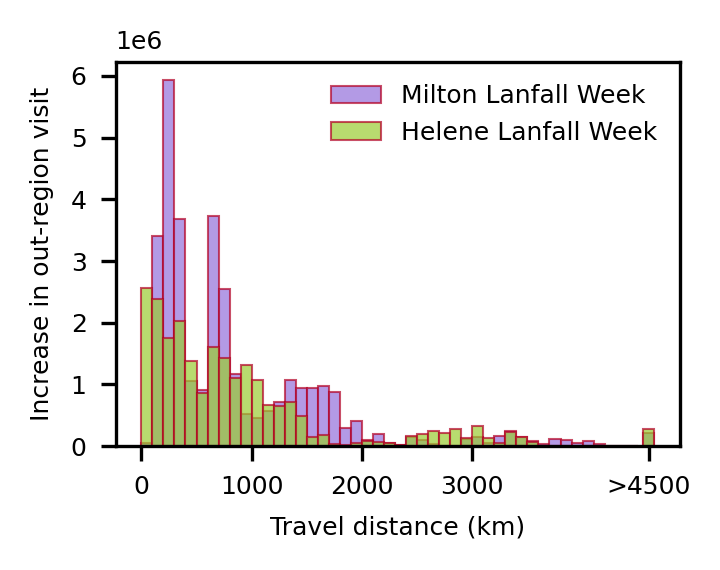

In [10]:
plt.figure(figsize=(2.5, 2.), dpi=300)
plt.bar(pos_bin_centers_m, counts_pos_m, width=wd_m, color='mediumpurple', alpha=0.7, label='Milton Lanfall Week',align='center',edgecolor=red_hex,linewidth=0.5)
plt.bar(pos_bin_centers_h, counts_pos_h, width=wd_h, color='yellowgreen', alpha=0.7, label='Helene Lanfall Week',align='center',edgecolor=red_hex,linewidth=0.5)

xticks = [0., 1000, 2000, 3000, 4600]  # Custom tick positions
xtick_labels = ['0', '1000', '2000', '3000','>4500']  # Corresponding labels
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(6)

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=6)
plt.tick_params(axis='both', labelsize=6)
# plt.plot(x_vals, pdf_pos, color='red', label='visit increase',ls='--')
# plt.plot(x_vals, pdf_neg, color='blue', label='visit decrease')
# plt.axvline(x=w_dis_ch_pos_m, color='mediumpurple', linestyle='--',alpha=1,lw=0.5)
# plt.axvline(x=w_dis_ch_pos_h, color='yellowgreen', linestyle='--',alpha=1,lw=0.5)
plt.legend(frameon=False,fontsize=6)
plt.xlabel('Travel distance (km)',size=6)
plt.ylabel('Increase in out-region visit',size=6)

plt.tight_layout()
# plt.savefig(f'../results/hist_travel_distance_increase_{cutoff_mile}.png', format = 'png',dpi=450,bbox_inches='tight',transparent=True)


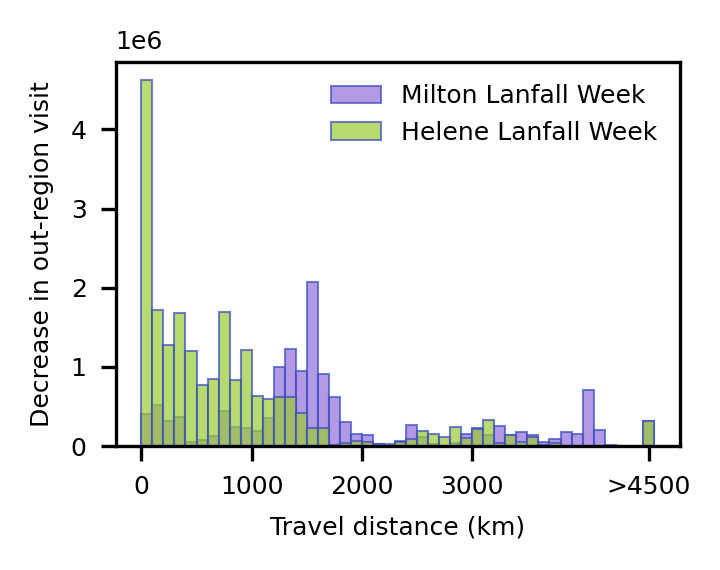

In [11]:
plt.figure(figsize=(2.5, 2.), dpi=300)
plt.bar(neg_bin_centers_m, counts_neg_m, width=wd_m, color='mediumpurple', alpha=0.7, label='Milton Lanfall Week',align='center',edgecolor=blue_hex,linewidth=0.5)
plt.bar(neg_bin_centers_h, counts_neg_h, width=wd_h, color='yellowgreen', alpha=0.7, label='Helene Lanfall Week',align='center',edgecolor=blue_hex,linewidth=0.5)

xticks = [0., 1000, 2000, 3000, 4600]  # Custom tick positions
xtick_labels = ['0', '1000', '2000', '3000','>4500']  # Corresponding labels
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(6)

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=6)
plt.tick_params(axis='both', labelsize=6)
# plt.plot(x_vals, pdf_pos, color='red', label='visit increase',ls='--')
# plt.plot(x_vals, pdf_neg, color='blue', label='visit decrease')
# plt.axvline(x=w_dis_ch_pos_m, color='mediumpurple', linestyle='--',alpha=1,lw=0.5)
# plt.axvline(x=w_dis_ch_pos_h, color='yellowgreen', linestyle='--',alpha=1,lw=0.5)
plt.legend(frameon=False,fontsize=6)
plt.xlabel('Travel distance (km)',size=6)
plt.ylabel('Decrease in out-region visit',size=6)

plt.tight_layout()
# plt.savefig(f'../results/hist_travel_distance_decrease_{cutoff_mile}.png', format = 'png',dpi=450,bbox_inches='tight',transparent=True)